In [1]:
import aequitas
import pandas as pd
import read_data as rd
from aequitas.group import Group

In [2]:
output_3 = pd.read_csv('output/3_for_aequitas.csv')

In [3]:
output_3.head()

,Unnamed: 0,best_prec,predicted_probs,label,officer_id
0,0,0.533333,0.002788,0,32395
1,1,0.533333,0.001875,0,31966
2,2,0.533333,0.011699,0,32102
3,3,0.533333,0.000000,0,32250
4,4,0.533333,0.019842,0,32074


In [4]:
output_3.shape

(1503, 5)

In [5]:
output_3['score'] = output_3.apply(lambda x: 1 if x['predicted_probs'] >= 0.0755 else 0, axis=1)

In [6]:
officers = rd.create_df('officer')

In [7]:
officers = officers[['id', 'gender', 'race']]

In [8]:
officers['id'] = officers.id.astype('int')

In [9]:
output_3 = output_3.merge(officers, left_on='officer_id', right_on='id')

In [10]:
output_3.head()

,Unnamed: 0,best_prec,predicted_probs,label,officer_id,score,id,gender,race
0,0,0.533333,0.002788,0,32395,0,32395,M,Hispanic
1,1,0.533333,0.001875,0,31966,0,31966,M,White
2,2,0.533333,0.011699,0,32102,0,32102,M,Asian/Pacific
3,3,0.533333,0.000000,0,32250,0,32250,M,White
4,4,0.533333,0.019842,0,32074,0,32074,M,Black


In [11]:
output_3.drop(columns=['best_prec', 'Unnamed: 0', 'predicted_probs', 'id', 'officer_id'], inplace=True)

In [12]:
output_3.rename(columns={'label': 'label_value'}, inplace=True)

In [13]:
g = Group()

In [14]:
output_3.dtypes

label_value     int64
score           int64
gender         object
race           object
dtype: object

In [15]:
output_3.head()

,label_value,score,gender,race
0,0,0,M,Hispanic
1,0,0,M,White
2,0,0,M,Asian/Pacific
3,0,0,M,White
4,0,0,M,Black


In [16]:
from aequitas.preprocessing import preprocess_input_df
output_3, _ = preprocess_input_df(output_3)

In [17]:
xtab, _ = g.get_crosstabs(output_3)

model_id, score_thresholds 1 {'rank_abs': [75]}


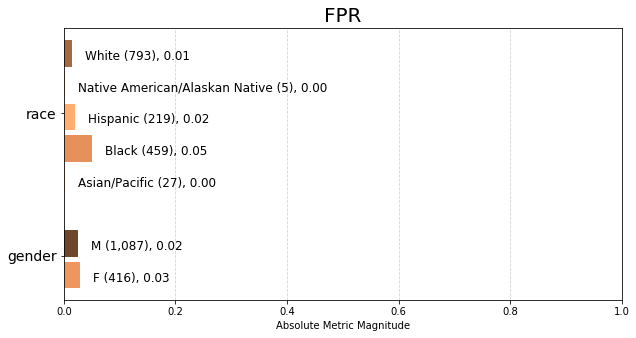

In [19]:
from aequitas.plotting import Plot
    
aqp = Plot()
fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

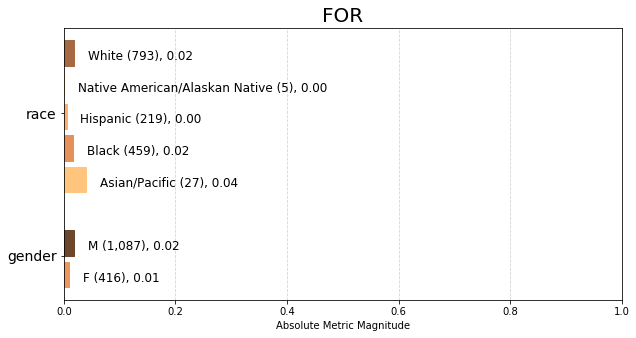

In [22]:
aqp.plot_group_metric(xtab, 'for')

get_disparity_predefined_group()


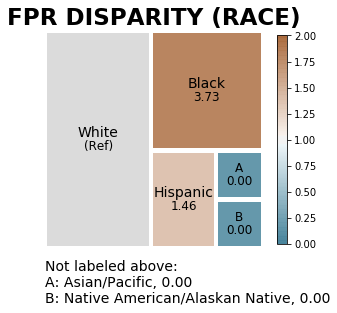

In [27]:
from aequitas.bias import Bias
    
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, 
                    original_df=output_3, 
                    ref_groups_dict={'race':'White', 'gender':'M'}, 
                    alpha=0.05, 
                    check_significance=False)
fpr_disparity = aqp.plot_disparity(bdf, group_metric='fpr_disparity', 
                                       attribute_name='race')

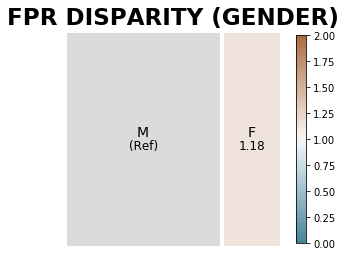

In [32]:
fpr_disparity_gender = aqp.plot_disparity(bdf, group_metric='fpr_disparity', 
                                       attribute_name='gender')

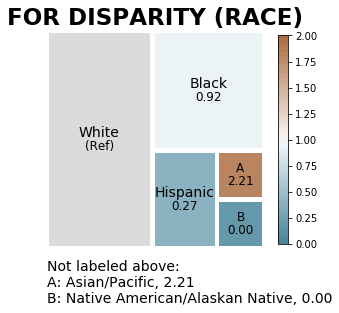

In [33]:
for_disparity = aqp.plot_disparity(bdf, group_metric='for_disparity', 
                                       attribute_name='race')

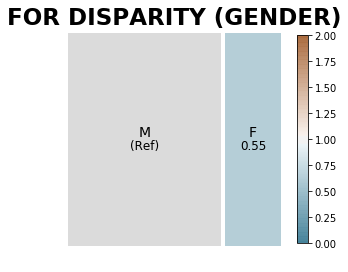

In [34]:
for_disparity_gender = aqp.plot_disparity(bdf, group_metric='for_disparity', 
                                       attribute_name='gender')

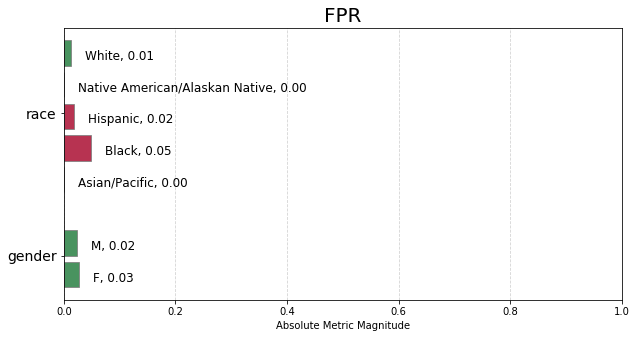

In [30]:
from aequitas.fairness import Fairness
    
f = Fairness()
fdf = f.get_group_value_fairness(bdf)
fpr_fairness = aqp.plot_fairness_group(fdf, group_metric='fpr', title=True)

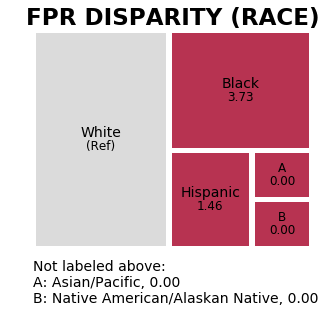

In [31]:
fpr_disparity_fairness = aqp.plot_fairness_disparity(fdf, group_metric='fpr', attribute_name='race')